# Data Management

## Introduction

### Defination of Data Management

Data management is the process of collecting, storing, organizing, protecting, verifying, and processing essential data while ensuring its accessibility, reliability, and timeliness.

### Importance of Data Management

**Improves Efficiency**: Organized data reduces time spent searching for information.

**Regulatory Compliance**: Helps meet legal and regulatory data handling requirements.

**Facilitates Data Security**: Safeguards sensitive information from unauthorized access.

**Cost Management**: Efficient data management can significantly reduce costs related to storage, processing, and data recovery.



## Component of Data Management

1. Data Governance
  *   Policies and procedures
  *   Compliance, privacy, and ethics
  *   Stewardship and ownership

2. Data Architecture
  *   Designing data systems
  *   Integration strategies
  *   Data modeling and metadata management

3. Data Storage and Operations
  *   Data warehousing
  *   Database management systems (DBMS)
  *   Data lakes and data lakehouses

4. Data Security
  *   Encryption and masking
  *   Access controls and audit trails
  *   Dealing with data breaches

### Automation in Data Management Using AI/ML

**Data Cleaning**: AI and ML algorithms can automatically detect and correct errors in datasets, such as missing values, duplicate records, outliers, and inconsistent entries.

  *   Pattern Recognition: ML algorithms can learn from examples to detect patterns and anomalies within the data, allowing for the identification and remediation of errors.
  *   Natural Language Processing (NLP): NLP can be used to clean text data, such as correcting spelling errors or standardizing terminology.

**Storage Optimization**: AI/ML can aid in the efficient storage of data by identifying the most appropriate storage mechanisms and formats for different types of data.

  *   Compression: ML algorithms can determine patterns and redundancies in data to compress it without loss, thus saving storage space.
  *   Data Deduplication: AI can detect and eliminate redundant copies of data to free up storage space

**Ensuring Data Quality**: ML models can continuously learn and adapt to ensure data remains high quality over time, flagging and correcting new types of errors as they emerge.

  *   Anomaly Detection: AI algorithms can continuously monitor data streams to detect outliers or unusual patterns that may indicate errors or fraud.
  *   Monitoring Changes: AI systems can track changes over time to ensure that the data quality is not degrading and that it aligns with compliance standards.

### Example: Data Cleaning and Preprocessing

In [1]:
!pip install numpy pandas scikit-learn matplotlib seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

## Dataset

We create a synthctic dataset using sklearn's `make_blobs` functions

In [2]:
data, _ = make_blobs(n_samples=1000, centers=3, n_features=3, random_state=42)
df = pd.DataFrame(data, columns=['Feature_1', 'Feature_2', 'Feature_3'])
print(df.shape)
print(df)

(1000, 3)
     Feature_1  Feature_2  Feature_3
0    -1.623134   8.877208   4.840013
1     1.712671  -5.152793  -6.783676
2    -1.944497   8.379681   5.635631
3    -8.991812   8.710780   3.168924
4    -4.301243   8.567513   5.844802
..         ...        ...        ...
995  -7.503425   7.953273   3.093712
996  -0.266880  -7.377990  -5.887421
997   2.365254  -7.068524  -6.327036
998  -9.941511   7.010980   0.367572
999  -1.735497   8.476144   3.293201

[1000 rows x 3 columns]


### Visualizing the raw data
Generate a scatter plot to visualize the raw data points.

/opt/conda/lib/python3.10/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


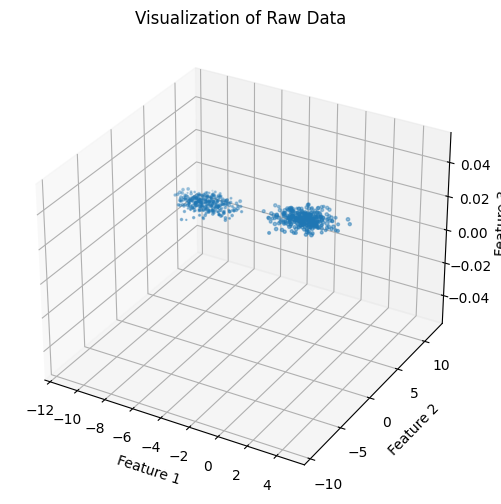

In [3]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(df['Feature_1'], df['Feature_2'], df['Feature_3'])
plt.title('Visualization of Raw Data')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.show()

### Data Cleaning
In this step, we perform the automated data cleaning techniques, like removing duplicates, handling missing values, or outlier detection.

In [4]:
df.duplicated().sum()

0

In [6]:
# E.g., Removing duplicates
df = df.drop_duplicates()


### Data Transformation
Applying Principal Component Analysis (PCA) to reduce dimensions.

shape (1000, 2)


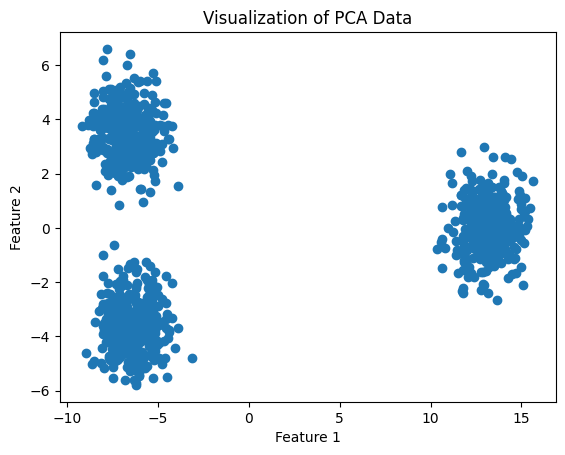

In [8]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)
print(f"shape {df_pca.shape}")
plt.scatter(df_pca[:, 0], df_pca[:, 1])
plt.title('Visualization of PCA Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Automated Data Classification
### Data preparation
Split the dataset into training and test sets.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df_pca, _, test_size=0.2, random_state=42)

## Model training
Train a simple machine learning model to classify the data points.

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluation
Evaluate model performance with appropriate metrics and visualize the results.

In [11]:
from sklearn.metrics import accuracy_score

y_pred = rf_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


## Build a automated pipeline

Create an end-to-end ML pipeline for data preprocessing, cleaning, and classification.

In [12]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('classifier', RandomForestClassifier(n_estimators=100))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('classifier', RandomForestClassifier())])

## More Algorithms (Practice)

We can apply KMeans(https://en.wikipedia.org/wiki/K-means_clustering) and DBSCAN(https://en.wikipedia.org/wiki/DBSCAN) to do the same job

(1000, 3)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


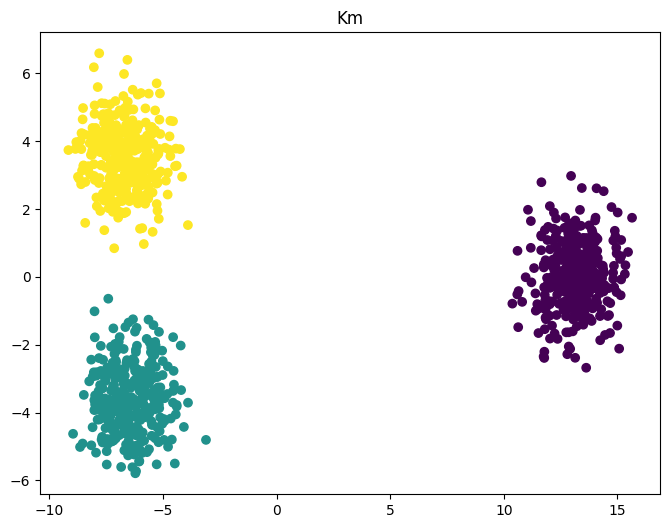

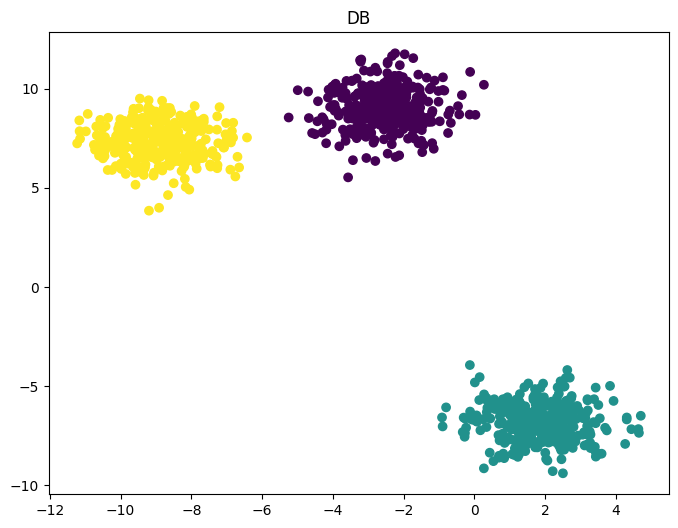

In [27]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from mpl_toolkits.mplot3d import Axes3D

# Generate the dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=3, random_state=42)

pca = PCA(n_components=2)
df_pca = pca.fit_transform(X)

print(X.shape)
# Apply KMeans
km = KMeans(n_clusters=3)
pred_km = km.fit_predict(df_pca)
# Apply DBSCAN
db = DBSCAN(eps=1.5, min_samples=3)
pred_db = db.fit_predict(df_pca)

# Visualization
fig = plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1],c=pred_km)
plt.title('Km')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.show()


# Visualization
fig = plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1],c=pred_db)
plt.title('DB')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.show()